In [1]:
import pandas as pd

In [ ]:
df_case   = pd.read_csv('../data/raw_with_coor/dengue_case.csv')
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    106987 non-null  object 
 1   Case_Confirmation_Date  100922 non-null  object 
 2   Sex                     106987 non-null  object 
 3   Age_Group               106987 non-null  object 
 4   City                    106987 non-null  object 
 5   Longitude               106193 non-null  float64
 6   Latitude                106193 non-null  float64
 7   Imported_Case           106987 non-null  object 
 8   Infection_City          98528 non-null   object 
 9   Infection_Country       104129 non-null  object 
 10  Serotype                13818 non-null   object 
 11  Cases                   106987 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 9.8+ MB


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/raw_with_coor/dengue_case.csv")  # Replace with your actual file path

# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop rows missing essential fields
df = df.dropna(subset=["Date", "City", "Longitude", "Latitude"])

# Group by date, city, and coordinates
daily_city = (
    df.groupby(["Date", "City", "Longitude", "Latitude", "Imported_Case"], as_index=False)
      .agg(Cases=("Cases", "sum"))
      .sort_values(["Date", "City"])
)
daily_city.info()

daily_city.to_csv('../data/raw_with_coor/dengue_case_arcgis.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100061 entries, 0 to 100060
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           100061 non-null  datetime64[ns]
 1   City           100061 non-null  object        
 2   Longitude      100061 non-null  float64       
 3   Latitude       100061 non-null  float64       
 4   Imported_Case  100061 non-null  object        
 5   Cases          100061 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.6+ MB


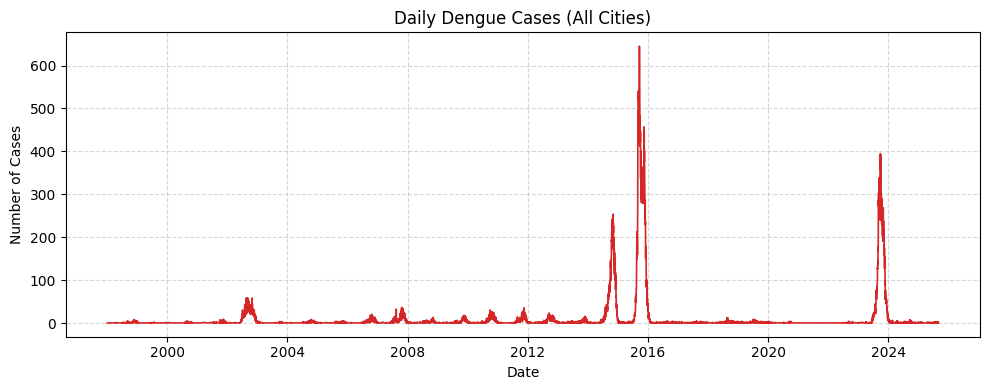

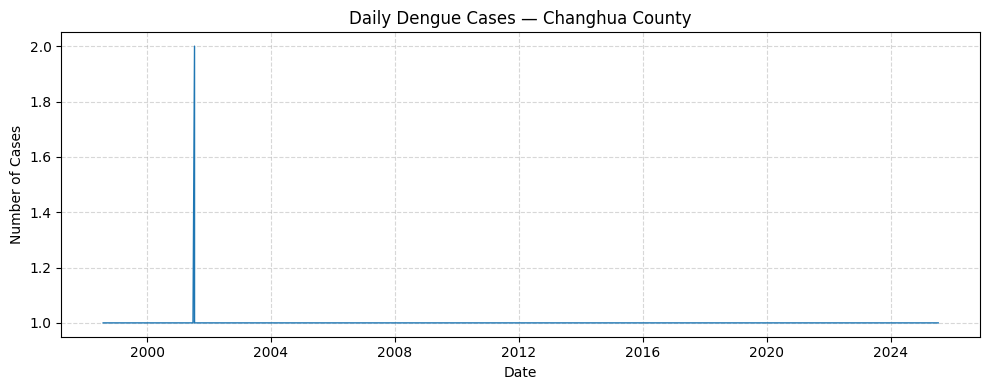

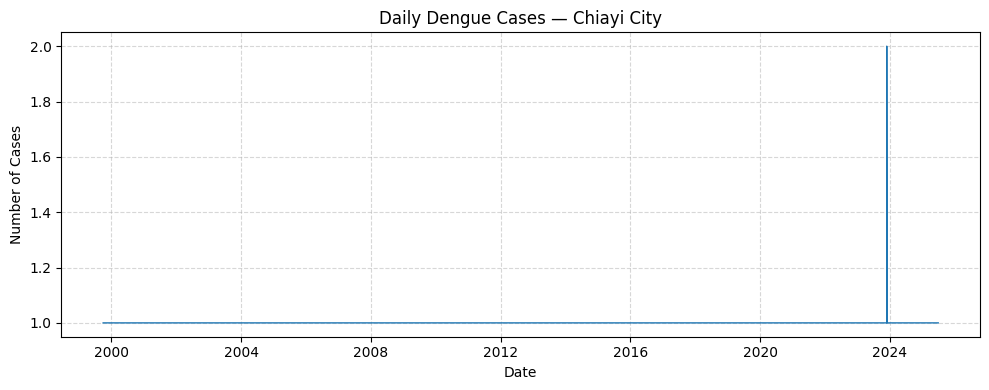

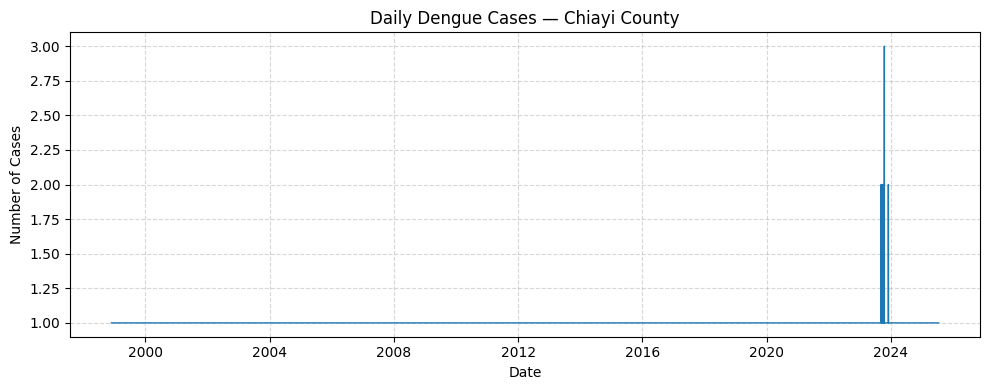

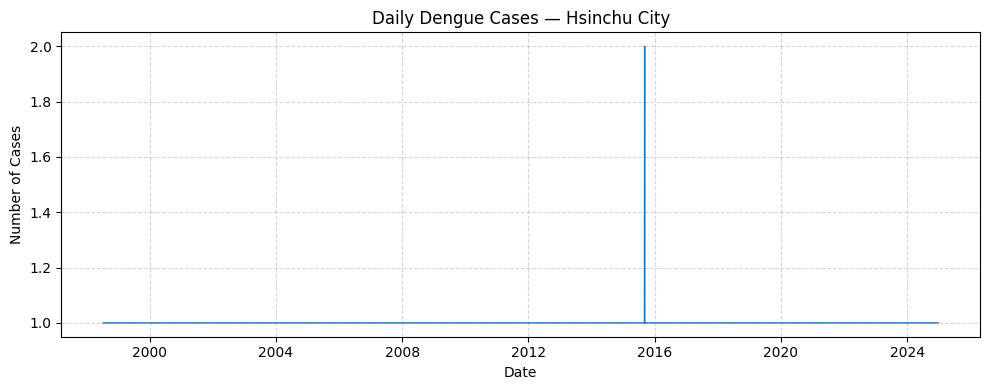

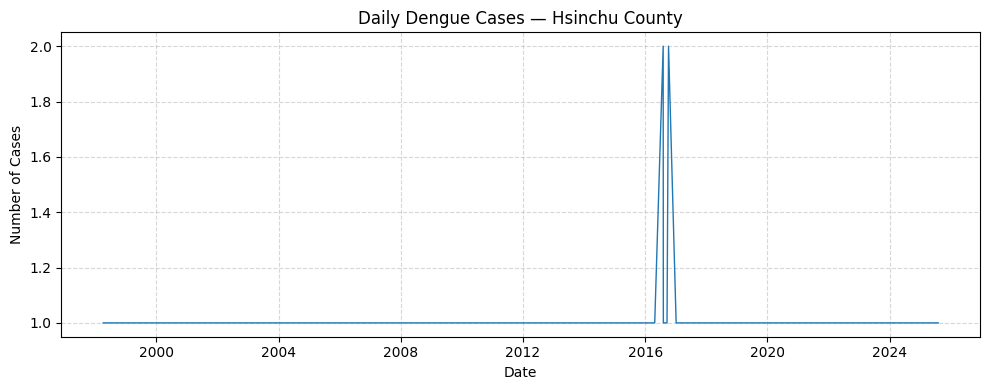

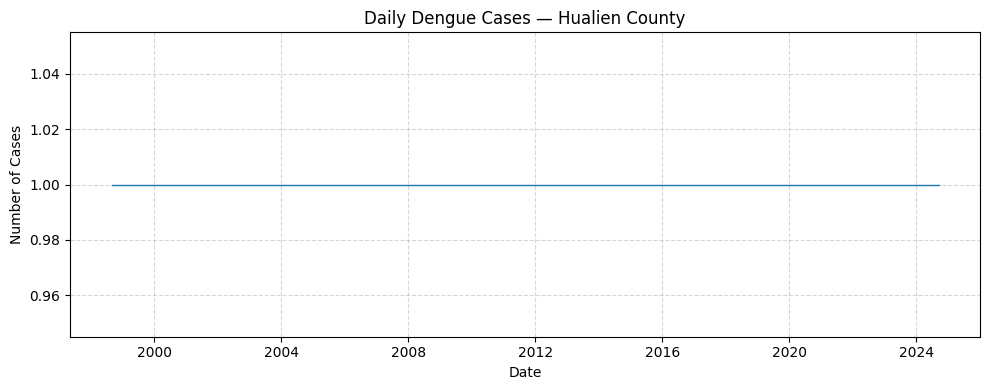

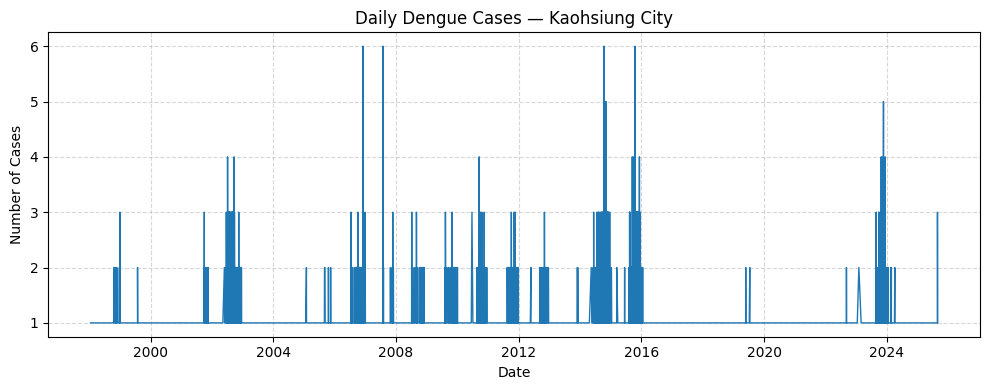

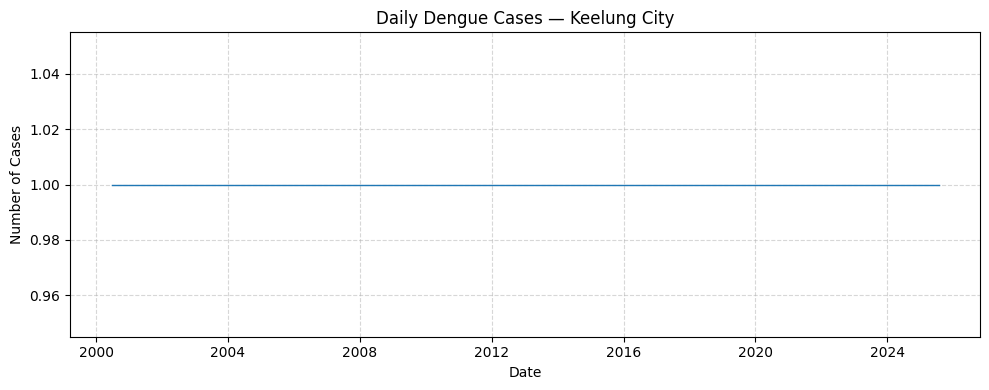

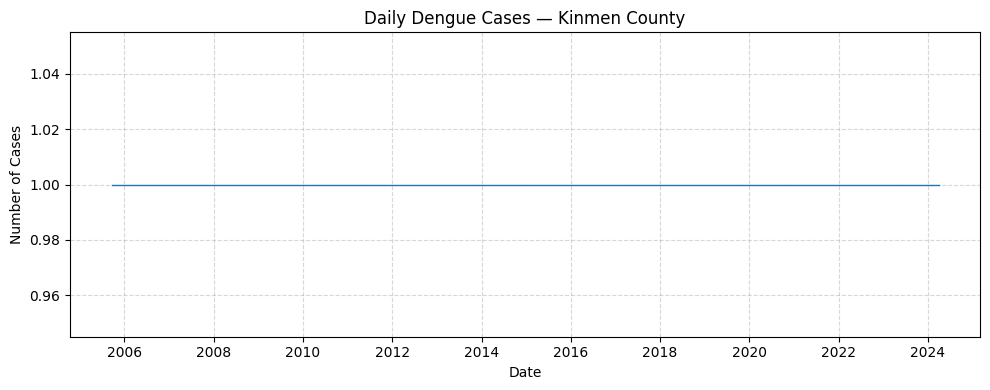

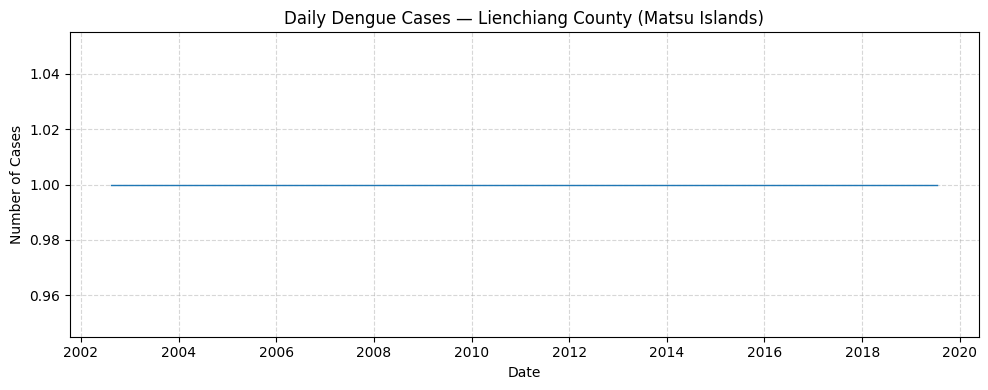

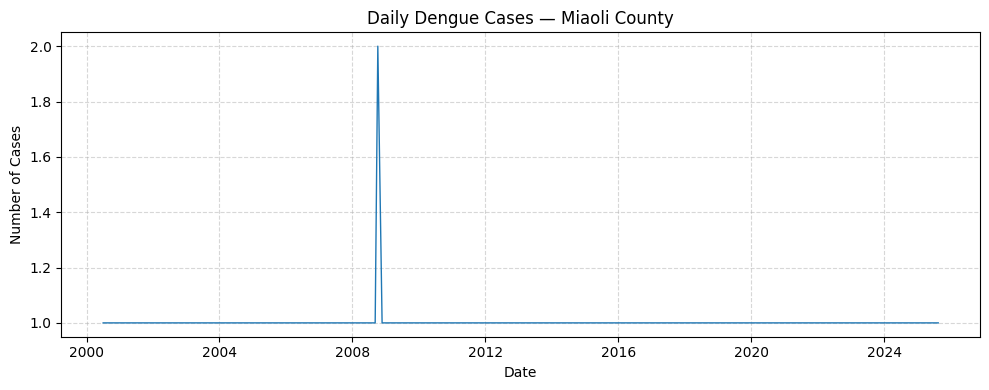

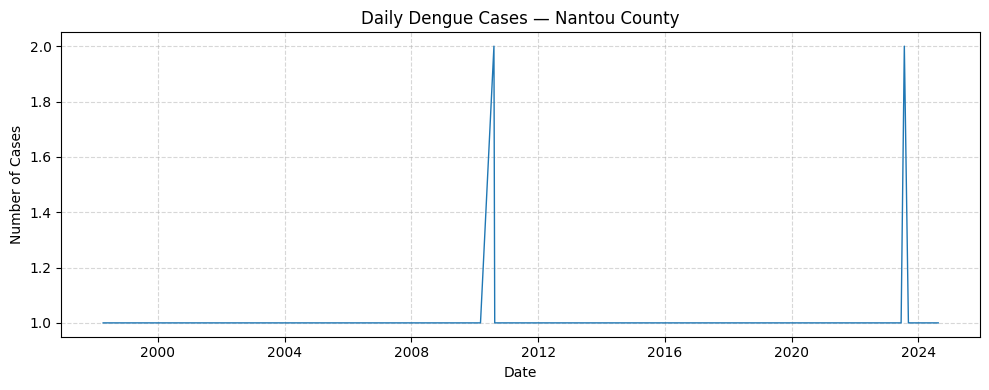

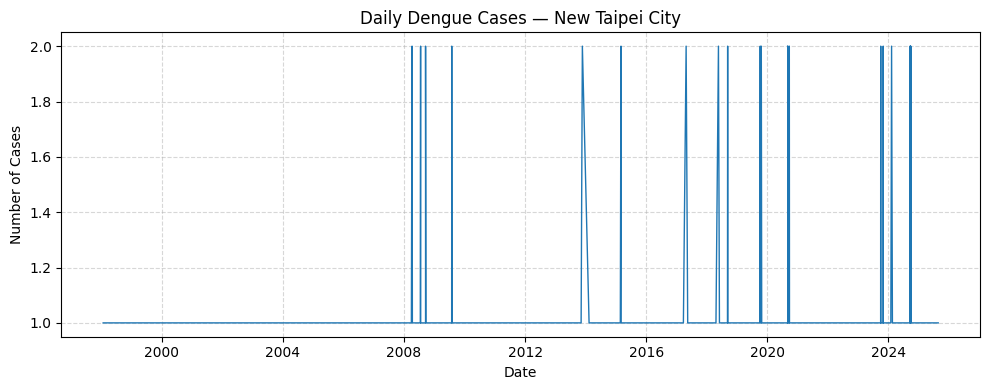

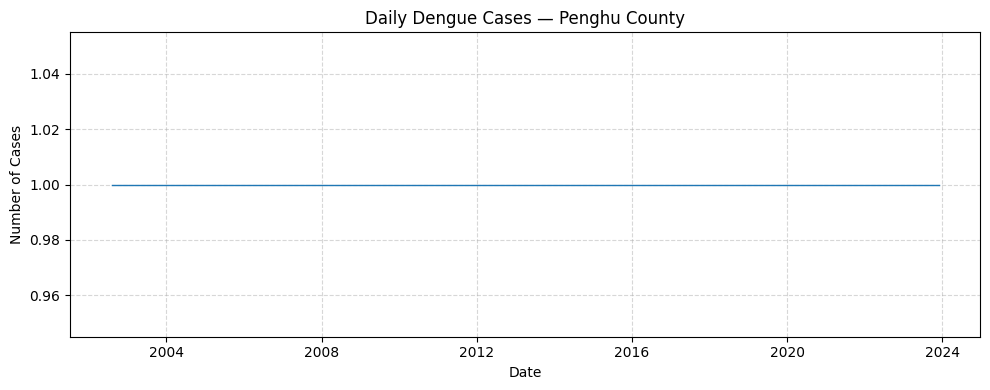

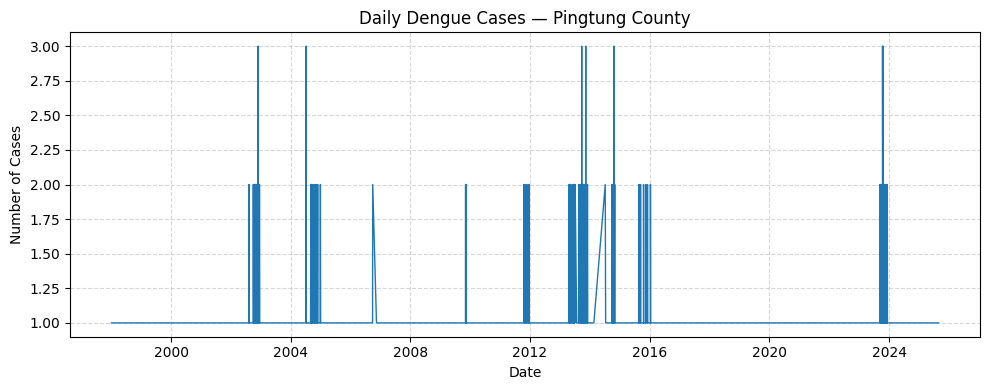

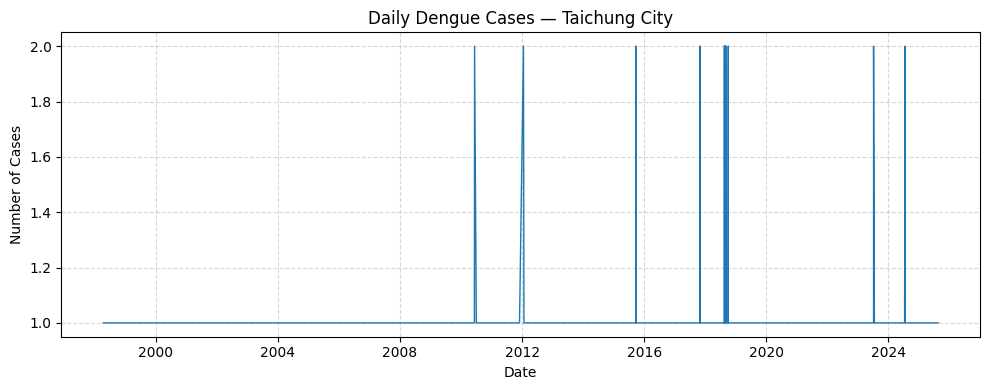

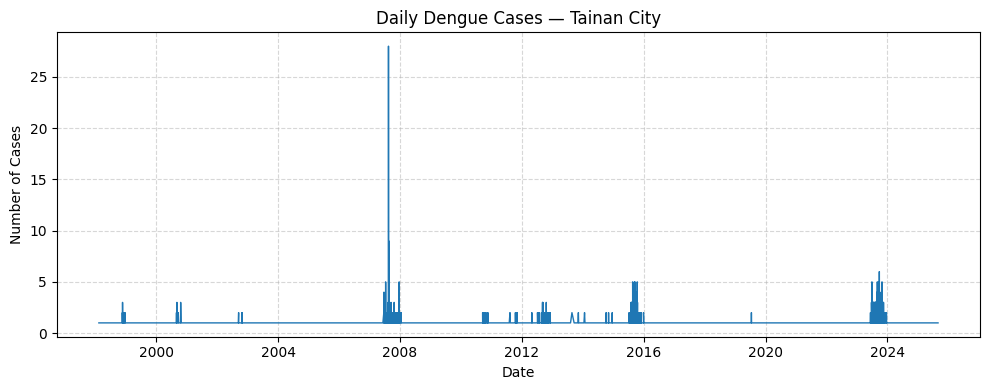

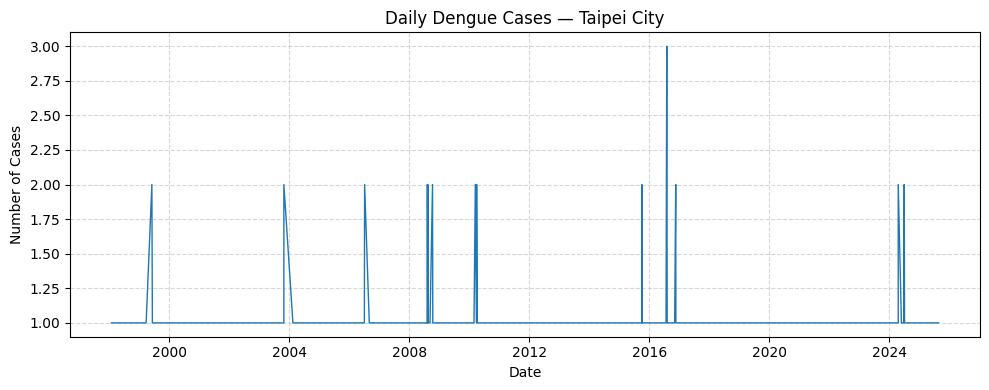

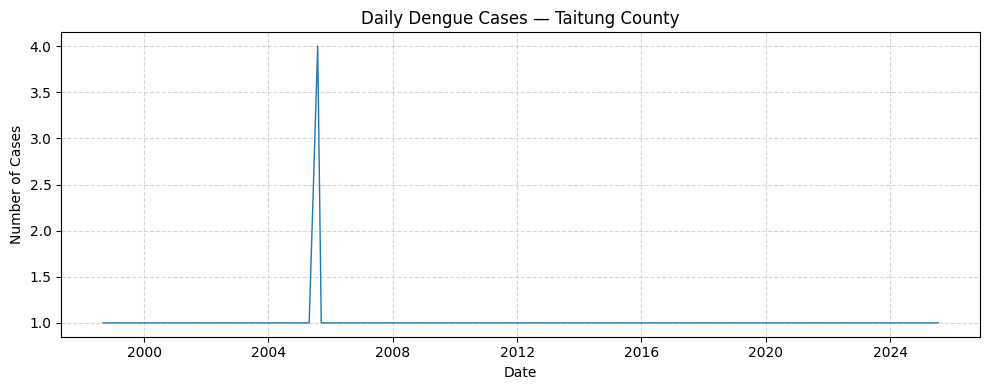

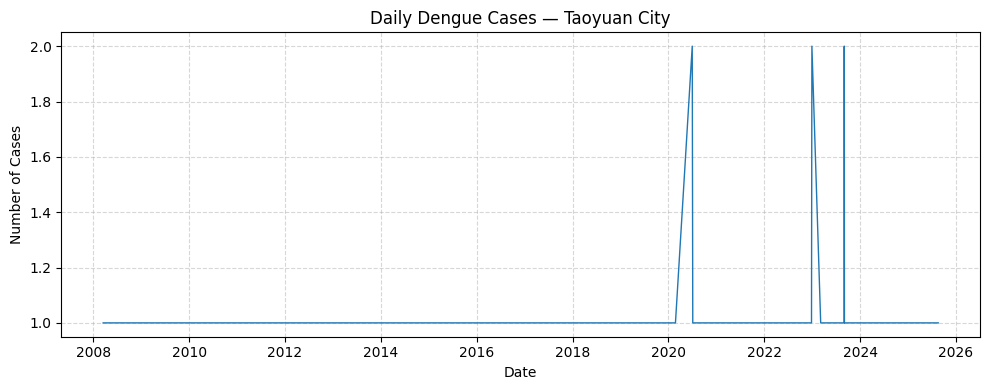

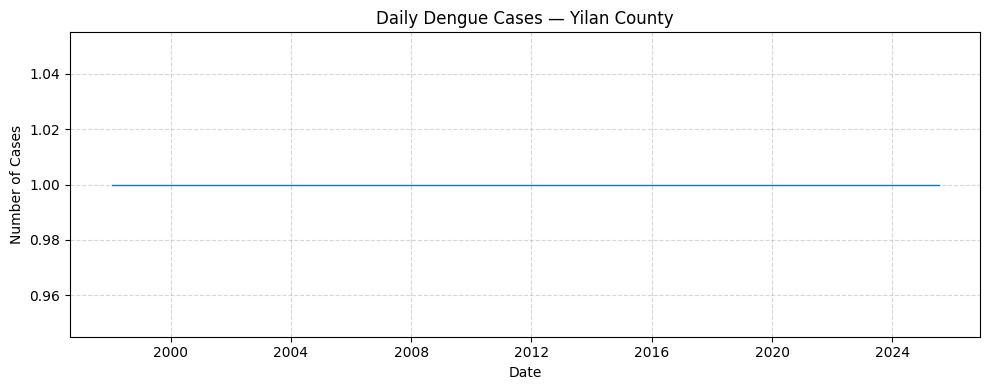

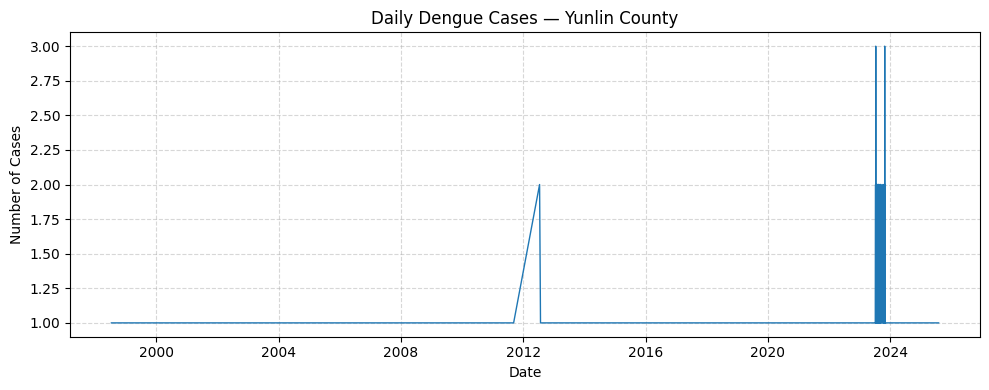

In [9]:
import matplotlib.pyplot as plt

# --- Plot daily total cases across Taiwan ---
total_daily = daily_city.groupby("Date")["Cases"].sum()

plt.figure(figsize=(10, 4))
plt.plot(total_daily.index, total_daily.values, color="tab:red", linewidth=1.2)
plt.title("Daily Dengue Cases (All Cities)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# --- Optional: Plot per city ---
for city, g in daily_city.groupby("City"):
    plt.figure(figsize=(10, 4))
    plt.plot(g["Date"], g["Cases"], linewidth=1)
    plt.title(f"Daily Dengue Cases — {city}")
    plt.xlabel("Date")
    plt.ylabel("Number of Cases")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
